In [22]:
using LinearAlgebra
using Plots
using Permutations
using Maxvol
using TSVD
using LaTeXStrings

# Definitions

In [2]:
f(x::Number, y::Number) = 1/(1 + x^2 + y^2);
g(x::Number, y::Number) = sqrt(x^2 + y^2)*(1 + 1/2*cos(15x + 22y));

n = 901;
t = [(2*(i-1)/(n-1) - 1) for i in 1:n];
A = [f(t_i, t_j) for t_i in t, t_j in t];
B = [g(t_i, t_j) for t_i in t, t_j in t];

# Exercise 1: Matrix Approximation by TSVD

In [3]:
function get_errors_tsvd(M ,k)
    U, s, V = tsvd(M, k)
    M_hat = U * Diagonal(s) * transpose(V)
    dM = M_hat - M
    return [norm(dM), norm(dM, Inf)]
end;

function sort_out_values(M, x, error_function)
    errors = [error_function(M, i) for i in x] 
    y_f = [i[1] for i in errors]
    y_m = [i[2] for i in errors]
    return y_f, y_m
end;

In [4]:
x_a = collect(1:rank(A))
x_b = collect(1:rank(B))
y_a_tsvd_f, y_a_tsvd_m = sort_out_values(A, x_a, get_errors_tsvd);
y_b_tsvd_f, y_b_tsvd_m = sort_out_values(B, x_b, get_errors_tsvd);

In [31]:
x_a_l = log.(x_a); x_b_l = log.(x_b);
p1 = plot(x_a_l, y_a_tsvd_f, title="A: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p2 = plot(x_a_l, y_a_tsvd_m, title="A: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p3 = plot(x_b_l, y_b_tsvd_f, title="B: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p4 = plot(x_b_l, y_b_tsvd_m, title="B: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
savefig(plot(p1, p2, p3, p4, layout=(2, 2), titlefontsize=10, xlabelfontsize=7, ylabelfontsize=5, dpi=300), "svd-err.png")


# Exercise 2: Matrix approx. by LU without pivoting

In [29]:
## EXERCISE 2
function M_cross_lu_err(M, r, pivot=Val(true))
    M_mk = copy(M[:, 1:r]);
    C = copy(M_mk);
    piv, ntimes = maxvol!(C);
    F = lu(M_mk[piv, :], pivot, check=false)
    M_mk[piv, :] =  F.P * F.L * F.U ;
    return M - C*M[piv, :], piv
end

function cross_lu_error(M, x, pivot) 
    y_frb = [norm(M_cross_lu_err(M, i,pivot)[1]) for i in x]
    y_max = [norm(M_cross_lu_err(M, i,pivot)[1], Inf) for i in x]
    return y_frb, y_max
end;

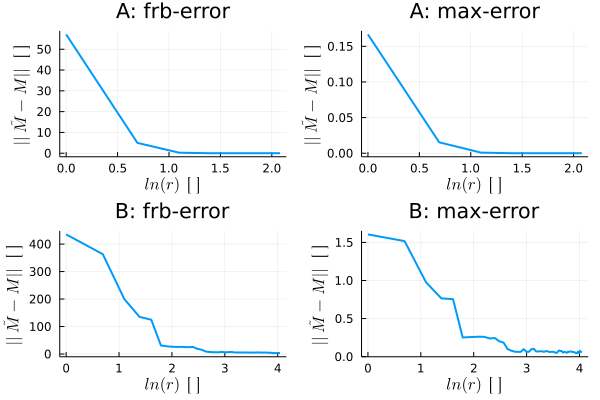

In [32]:
y_err_A_frb_np, y_err_A_max_np = cross_lu_error(A, x_a, Val(false));
y_err_B_frb_np, y_err_B_max_np = cross_lu_error(B, x_b, Val(false));

p1 = plot(x_a_l, y_err_A_frb_np, title="A: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p2 = plot(x_a_l, y_err_A_max_np, title="A: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p3 = plot(x_b_l, y_err_B_frb_np, title="B: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p4 = plot(x_b_l, y_err_B_max_np, title="B: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
savefig(plot(p1, p2, p3, p4, layout=(2, 2), titlefontsize=10, xlabelfontsize=7, ylabelfontsize=5, dpi=300), "lu-np-err.png")
plot(p1, p2, p3, p4, layout=(2,2))

# Exercise 3: Matrix approx. by LU with pivoting

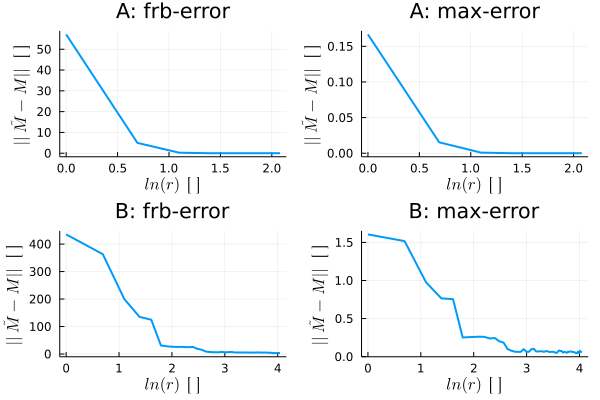

In [34]:
y_err_A_frb_p, y_err_A_max_p = cross_lu_error(A, x_a, Val(true));
y_err_B_frb_p, y_err_B_max_p = cross_lu_error(B, x_b, Val(true));

p1 = plot(x_a_l, y_err_A_frb_p, title="A: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p2 = plot(x_a_l, y_err_A_max_p, title="A: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p3 = plot(x_b_l, y_err_B_frb_p, title="B: frb-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
p4 = plot(x_b_l, y_err_B_max_p, title="B: max-error", lw=2, xlabel=L"ln(r)\;\;[\;]", ylabel=L"||\tilde{M} -M||\;\;[\;]", label="");
savefig(plot(p1, p2, p3, p4, layout=(2, 2), titlefontsize=10, xlabelfontsize=7, ylabelfontsize=5, dpi=300), "lu-p-err.png")
plot(p1, p2, p3, p4, layout=(2,2))

# Exercise 4: graph restrictions  by LU vizualization

In [41]:
r_b = [1, 2, 3, 4, 5, 10, 15, 20 ,30 , 40]
r_a = [1, 2, 3, 4, 5]
P_A_s = [M_cross_lu_err(A, i, Val(true))[2] for i in r_a]
P_B_s = [M_cross_lu_err(B, i, Val(true))[2] for i in r_b]
t_red = t[1:3:n];

In [71]:
s_1 = surface(t_red, t_red, f, colorbar=false);
c_1 = contour(t_red, t_red, f, colorbar=false);
#s_2 = surface(t_red, t_red, g, colorbar=false);
#c_2 = contour(t_red, t_red, g, colorbar=false);
for (i, r) in enumerate(r_a)
    p = plot(s_1, c_1, layout=(1, 2), titlefontsize=10, xlabelfontsize=7, ylabelfontsize=5, dpi=300,
            title="f(x, y) at r=$r", size=(600, 300))

    hline!(p[1], [0], t[P_A_s[i]], color=:red, opacity=0.5, label="", lw=2)
    hline!(p[2], [0], t[P_A_s[i]], color=:red, opacity=0.5, label="", lw=2)
    #hline!(p[1], [1], t[P_B_s[i]], color=:red, opacity=0.5, label="", lw=2)
    #hline!(p[2], [1], t[P_B_s[i]], color=:red, opacity=0.5, label="", lw=2)
    savefig(p, "rc-a-$r.png")
end

"f"